<a href="https://colab.research.google.com/github/duc-ke/study-book-keras_with_blocks/blob/master/test/1_earlystopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 과적합 모델을 만들어 Earlystopping 적용.

In [0]:
!git clone https://github.com/duc-ke/study-keras-deeplearning.git
%run study-keras-deeplearning/3분딥러닝케라스맛/0_custom_libraries.ipynb

fatal: destination path 'study-keras-deeplearning' already exists and is not an empty directory.


In [0]:
from keras.layers import Dense, Activation
from keras.models import Sequential

from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
from sklearn import model_selection

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape

# train, validation set 분리
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train, y_train, test_size=1/6, random_state=42)
# x_val = x_train[50000:]
# y_val = y_train[50000:]
# x_train = x_train[:50000]
# y_train = y_train[:50000]
x_train.shape, x_val.shape

# 전처리
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

n_train = x_train.shape[0]
n_test = x_test.shape[0]
n_val = x_val.shape[0]

x_train = x_train.reshape(n_train, -1)
x_test = x_test.reshape(n_test, -1)
x_val = x_val.reshape(n_val, -1)
print(x_train.shape)
print(x_val.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_val = np_utils.to_categorical(y_val, 10)

# 일부만 고르기
train_idx = np.random.choice(n_train, 700)
val_idx = np.random.choice(n_val, 300)
x_train = x_train[train_idx]
x_val = x_val[val_idx]
y_train = y_train[train_idx]
y_val = y_val[val_idx]

(50000, 784)
(10000, 784)


In [0]:
# 모델링
Nin = 28*28


def mlp():
  model = Sequential()
  model.add(Dense(2, activation='relu', input_shape=(Nin,)))
  # model.add(Dense(2, activation='relu', input_dim=28*28))    # 위나 아래나 둘다 사용가능
  model.add(Dense(10, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return model


In [0]:
model = mlp() 
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=10, 
                    validation_data=(x_val, y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/200
700/700 [==============================] - 0s 696us/step - loss: 2.2796 - acc: 0.1371 - val_loss: 2.2616 - val_acc: 0.1033
Epoch 2/200
700/700 [==============================] - 0s 306us/step - loss: 2.2452 - acc: 0.1257 - val_loss: 2.2318 - val_acc: 0.1600
Epoch 3/200
700/700 [==============================] - 0s 308us/step - loss: 2.2191 - acc: 0.1429 - val_loss: 2.2101 - val_acc: 0.1733
Epoch 4/200
700/700 [==============================] - 0s 312us/step - loss: 2.1956 - acc: 0.1486 - val_loss: 2.1900 - val_acc: 0.1700
Epoch 5/200
700/700 [==============================] - 0s 384us/step - loss: 2.1757 - acc: 0.1686 - val_loss: 2.1723 - val_acc: 0.1733
Epoch 6/200
700/700 [==============================] - 0s 372us/step - loss: 2.1567 - acc: 0.1914 - val_loss: 2.1581 - val_acc: 0.1900
Epoch 7/200
700/700 [==============================] - 0s 353us/step - loss: 2.1391 - acc: 0.2029 - val_loss: 2.1415 - val_acc: 0.1767
Epoch 8/2

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 1570      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


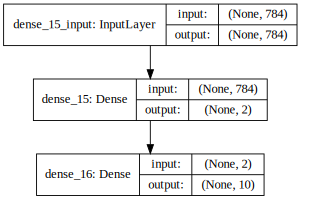

In [0]:
visualize_model(model)

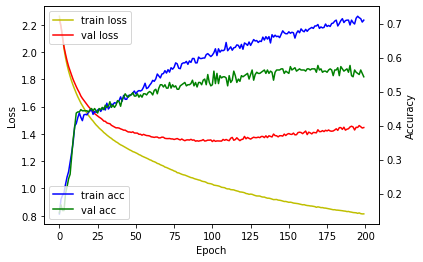

In [0]:
# 두 번째 시도
plot_accloss(history)

#### 과적합 모델이 됨을 확인.
Earlystopping(조기종료)를 적용 시켜 보자

In [0]:
from keras.callbacks import EarlyStopping

Train on 700 samples, validate on 300 samples
Epoch 1/200
700/700 [==============================] - 1s 740us/step - loss: 2.3069 - acc: 0.0814 - val_loss: 2.3020 - val_acc: 0.0667
Epoch 2/200
700/700 [==============================] - 0s 325us/step - loss: 2.2949 - acc: 0.0586 - val_loss: 2.2858 - val_acc: 0.0467
Epoch 3/200
700/700 [==============================] - 0s 324us/step - loss: 2.2532 - acc: 0.0914 - val_loss: 2.2425 - val_acc: 0.1033
Epoch 4/200
700/700 [==============================] - 0s 363us/step - loss: 2.2055 - acc: 0.1186 - val_loss: 2.2073 - val_acc: 0.0900
Epoch 5/200
700/700 [==============================] - 0s 320us/step - loss: 2.1690 - acc: 0.1343 - val_loss: 2.1763 - val_acc: 0.1500
Epoch 6/200
700/700 [==============================] - 0s 286us/step - loss: 2.1361 - acc: 0.1657 - val_loss: 2.1499 - val_acc: 0.1500
Epoch 7/200
700/700 [==============================] - 0s 293us/step - loss: 2.1022 - acc: 0.1857 - val_loss: 2.1106 - val_acc: 0.1900
Epoch 8/2

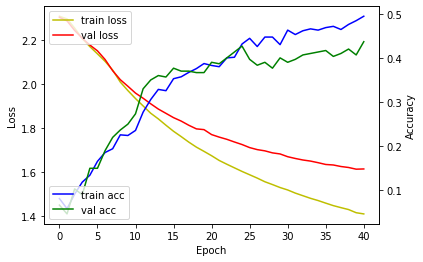

In [0]:
model = mlp() 
early_stopping = EarlyStopping()
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=10, 
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

plot_accloss(history)

#### val_loss가 기준이므로 오르자 마자 종료 시켜짐. 40번밖에 안감. -> 정확도가 충분히 높지 않음.
> patience인자 사용하여 20회의 오름을 기다려 줌

Train on 700 samples, validate on 300 samples
Epoch 1/200
700/700 [==============================] - 1s 831us/step - loss: 2.2815 - acc: 0.1157 - val_loss: 2.2672 - val_acc: 0.1133
Epoch 2/200
700/700 [==============================] - 0s 346us/step - loss: 2.2276 - acc: 0.1543 - val_loss: 2.2331 - val_acc: 0.1633
Epoch 3/200
700/700 [==============================] - 0s 300us/step - loss: 2.1883 - acc: 0.2000 - val_loss: 2.1954 - val_acc: 0.2067
Epoch 4/200
700/700 [==============================] - 0s 310us/step - loss: 2.1482 - acc: 0.2543 - val_loss: 2.1623 - val_acc: 0.2300
Epoch 5/200
700/700 [==============================] - 0s 323us/step - loss: 2.1075 - acc: 0.2729 - val_loss: 2.1299 - val_acc: 0.2600
Epoch 6/200
700/700 [==============================] - 0s 329us/step - loss: 2.0698 - acc: 0.2957 - val_loss: 2.0929 - val_acc: 0.2600
Epoch 7/200
700/700 [==============================] - 0s 298us/step - loss: 2.0327 - acc: 0.3057 - val_loss: 2.0607 - val_acc: 0.2833
Epoch 8/2

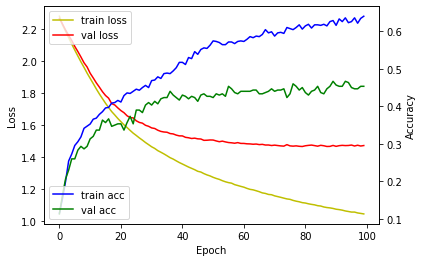

In [0]:
model = mlp() 
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=10, 
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

plot_accloss(history)

#### patience를 이용하면 정확도가 충분히 오름을 확인 가능.

> 'ModelCheckpoint()'를 활용하면 매 epoch마다 학습된 가중치를 저장할 수 있음. 학습시간이 길다면 이걸 활용하여 과적합 시점에 학습을 그만둬야 함.